In [11]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo',start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6863 entries, 1995-01-03 to 2022-04-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6863 non-null   float64
 1   MSFT    6863 non-null   float64
 2   F       6863 non-null   float64
 3   GE      6863 non-null   float64
dtypes: float64(4)
memory usage: 268.1 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971824,2.377004,3.953286,31.972105
1995-01-04,7.907918,2.394283,4.059654,31.972105
1995-01-05,7.796087,2.354789,4.024197,32.050484
1995-01-06,7.812064,2.394283,4.024197,31.893740
1995-01-09,7.780115,2.379473,4.095106,31.580284


In [5]:
mydata.iloc[0]

PG       7.971824
MSFT     2.377004
F        3.953286
GE      31.972105
Name: 1995-01-03 00:00:00, dtype: float64

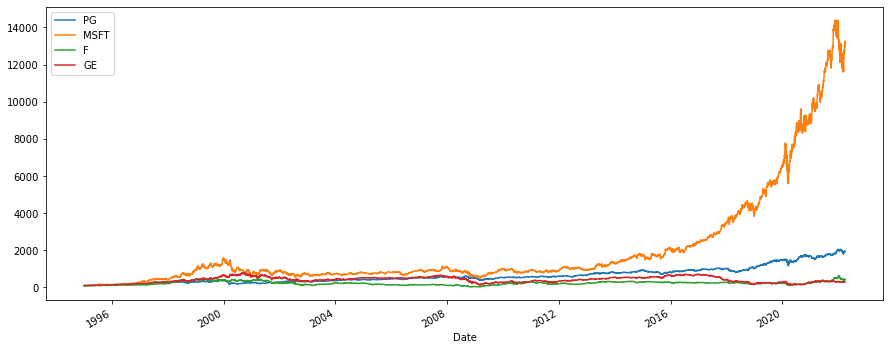

In [6]:
(mydata/mydata.iloc[0]*100).plot(figsize =(15, 6))   #normalization 
plt.show()

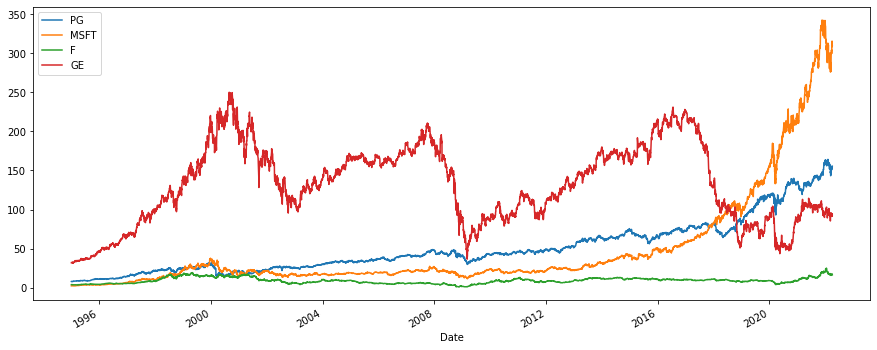

In [7]:
mydata.plot(figsize =(15, 6))
plt.show()

In [8]:
#Calculating the return of a portfolio of securities

In [9]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004891
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [10]:
annual_returns = returns.mean()*250
annual_returns

PG      0.133180
MSFT    0.226377
F       0.132876
GE      0.090070
dtype: float64

In [14]:
weights =np.array([0.25,0.25,0.25,0.25])

In [15]:
np.dot(annual_returns, weights)

0.14562574036892828

In [16]:
pfolio_1=str(round(np.dot(annual_returns, weights),5)*100)+'%'
print(pfolio_1)

14.563%


In [17]:
weights_2 =np.array([0.4,0.4,0.15,0.05])

In [18]:
pfolio_2=str(round(np.dot(annual_returns, weights_2),5)*100)+'%'
print(pfolio_1)
print(pfolio_2)

14.563%
16.826%


In [23]:
tickers_2 =['^GSPC','^IXIC','^GDAXI']
ind_data = pd.DataFrame()
for t in tickers_2:
    ind_data[t]=wb.DataReader(t, data_source='yahoo',start='2002-1-1')['Adj Close']

In [24]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2002-01-02,1154.670044,1979.250000,5167.879883
2002-01-03,1165.270020,2044.270020,5270.290039
2002-01-04,1172.510010,2059.379883,5318.729980
2002-01-07,1164.890015,2037.099976,5232.220215
2002-01-08,1160.709961,2055.739990,5236.370117


In [25]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2022-03-29,4631.600098,14619.639648,14820.330078
2022-03-30,4602.450195,14442.269531,14606.049805
2022-03-31,4530.410156,14220.519531,14414.750000
2022-04-01,4545.859863,14261.500000,14446.480469
2022-04-04,4582.640137,14532.553711,14518.160156


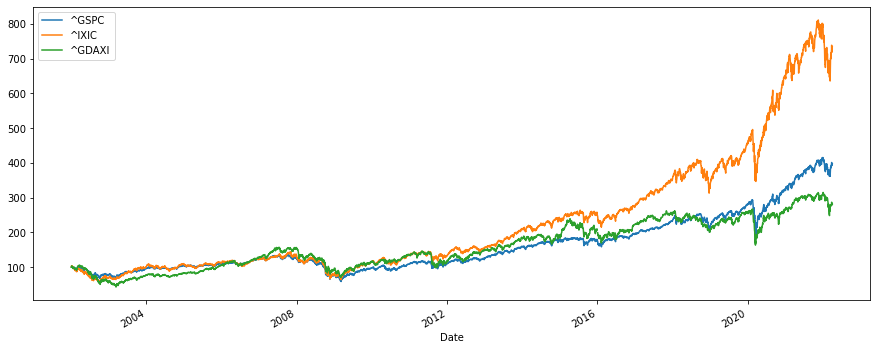

In [26]:
(ind_data/ind_data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [28]:
ind_returns=(ind_data/ind_data.shift(1))-1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2022-03-29,0.012257,0.018442,0.027950
2022-03-30,-0.006294,-0.012132,-0.014459
2022-03-31,-0.015653,-0.015354,-0.013097
2022-04-01,0.003410,0.002882,0.002201
2022-04-04,0.008091,0.019006,0.004962


In [29]:
annual_ind_returns=ind_returns.mean()*250
annual_ind_returns

^GSPC     0.086343
^IXIC     0.121978
^GDAXI    0.063980
dtype: float64

In [ ]:
#Comparing Nasdaq, S&P500, and Dow Jones indices

In [30]:
tickers_3 =['PG','^GSPC','^DJI']
ind_data=pd.DataFrame()
for t in tickers_3:
    ind_data[t]=wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [31]:
ind_data.tail()

,PG,^GSPC,^DJI
Date,,,
2022-03-29,155.460007,4631.600098,35294.191406
2022-03-30,154.389999,4602.450195,35228.808594
2022-03-31,152.800003,4530.410156,34678.351562
2022-04-01,155.089996,4545.859863,34818.269531
2022-04-04,154.080002,4582.640137,34921.878906


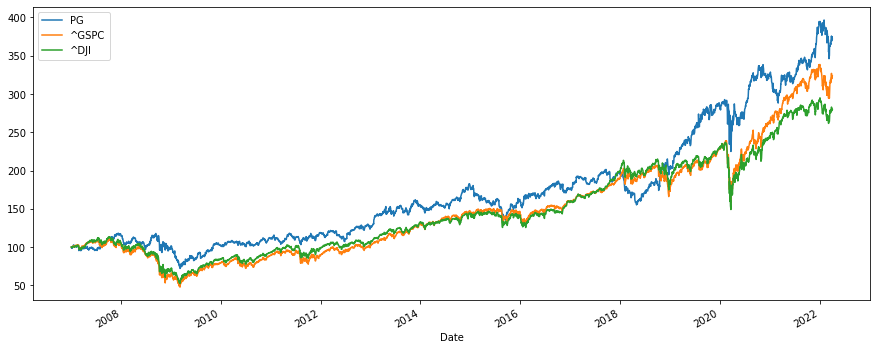

In [32]:
(ind_data/ind_data.iloc[0]*100).plot(figsize=(15,6))
plt.show()